# Deep Learning
## Formative assessment
### Week 1: Introduction to Deep Learning

#### Instructions

In this notebook, you will write code to implement a linear regression model in TensorFlow. You will implement the analytic solution, as well as a low-level training loop to update parameters using gradient descent.

Some code cells are provided you in the notebook. You should avoid editing provided code, and make sure to execute the cells in order to avoid unexpected errors. Some cells begin with the line: 

`#### GRADED CELL ####`

These cells require you to write your own code to complete them.

#### Let's get started!

We'll start by running some imports, and loading the dataset.

In [1]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pathlib import Path

# If you would like to make further imports from Tensorflow, add them here




<img src="figures/life_expectancy_wikipedia.png" title="Life expectancy" style="width: 450px;"/>
<center><font style="font-size:12px">source: <a href=https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy>wikipedia</a></font></center>

#### The WHO Life Expectancy dataset
In this formative assessment, you will use the [WHO Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who) from Kaggle. This dataset was collected from the Global Health Observatory (GHO) data repository under the World Health Organization (WHO), for the purpose of health data analysis. The dataset includes multiple factors affecting life expectancy across 133 countries, divided into the broad categories of immunization related factors, mortality factors, economical factors and social factors.

Your goal is to use TensorFlow to model the dataset using linear regression.

#### Load and subset the data

In [2]:
# Run this cell to load and describe the data

df = pd.read_csv(Path("./data/Life Expectancy Data.csv"))
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


We will work the following columns from the DataFrame:

In [3]:
# This is the list of columns to use from the DataFrame

cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', ' BMI ',
        'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 
        'GDP', 'Income composition of resources', 'Schooling']

You should now complete the following function, according to the following specifications:

* Extract the columns above from the loaded DataFrame
* Remove any rows with `NaN` values
* Define a 1-D numpy array using the values in the `Life expectancy ` column. This will be the target variable
* Define a 2-D numpy array using the values from all remaining columns. This array should have shape `(num_examples, num_features)`. These will be the input variables
* The function should then return the tuple of constant `tf.Tensor` objects `(input_variables, target_variable)` of type `tf.float32`

In [4]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_inputs_and_targets(dataframe, columns):
    """
    This function takes in the loaded DataFrame and column list as above, and extracts the
    numpy arrays as described above.
    Your function should return a tuple (input_variables, target_variable) of Tensors.
    """
    # Extract the columns above from the loaded DataFrame & Remove any rows with `NaN` values
    df_filtered = dataframe[columns].dropna()
    # target variable and make it a Tensor of floats32
    target_variable = df_filtered['Life expectancy '].values
    target_variable = tf.convert_to_tensor(target_variable, dtype=tf.float32)
    # input variables and make it a Tensor of floats32
    input_variables = df_filtered.drop(columns=['Life expectancy ']).values
    input_variables = tf.convert_to_tensor(input_variables, dtype=tf.float32)
    return (input_variables, target_variable)
    

In [5]:
# Run your function to get the input and target Tensors

X, y = get_inputs_and_targets(df, cols)

In [9]:
# Split the data into training and test sets and standardise the input scales

X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, y_train = tf.constant(X_train), tf.constant(y_train)
X_test, y_test = tf.constant(X_test), tf.constant(y_test)

#### Linear regression model

We will fit a simple model of the form

$$
y = f_\theta(\mathbf{x}) + \epsilon,
$$

where $y\in\mathbb{R}$ is the target variable, $\mathbf{x}\in\mathbb{R}^{10}$ are the input features, $\theta\in\mathbb{R}^{11}$ are the model parameters, $\epsilon\sim\mathcal{N}(0, 1)$ is the observation noise random variable, and $f_\theta:\mathbb{R}^{10}\mapsto\mathbb{R}$ is given by

$$
\begin{align}
f_\theta(\mathbf{x}) &= \theta_0 + \sum_{m=1}^{10} \theta_m x_m\\
&= \sum_{m=0}^{10} \theta_m x_m.
\end{align}
$$

In the second line above we have defined $x_0=1$ to be the constant feature. The maximum likelihood solution is given by the normal equation

$$
\theta_{ML} = \left(\mathbf{X}^T \mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y},
$$

where $\mathbf{X}\in\mathbb{R}^{N\times M}$ is the data matrix, $\mathbf{y}\in\mathbb{R}^N$ are the targets, $N$ is the number of data examples, and $M$ are the number of features (including the constant feature).

You should now complete the following function to implement the normal equation to compute the maximum likelhood solution. Your code should only use TensorFlow functions. 

* The arguments to the function are an `inputs` Tensor of shape `(num_examples, num_features)`, and a `targets` Tensor of shape `(num_examples,)`
* The function should add a column of ones as the first column to the `inputs` Tensor for the constant feature
* The function should output a 1-D Tensor of parameters of length `(num_features + 1,)` (the first entry will be the bias)

_Hint: check [the docs](https://www.tensorflow.org/api/stable) for relevant TensorFlow functions, including the_ [`tf.linalg`](https://www.tensorflow.org/api_docs/python/tf/linalg) _module._

In [16]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def normal_equation(inputs, targets):
    """
    This function takes in inputs and targets Tensors, and implements the normal equation
    as above, only using TensorFlow functions.
    Your function should return a Tensor for the maximum likelihood solution for the parameters.
    """
    num_examples, num_features = inputs.shape
    # Add a column of ones to the inputs for the bias term
    ones = tf.ones((num_examples, 1), dtype=tf.float32)
    inputs = tf.concat([ones, inputs], axis=1)
    # Calculate the maximum likelihood estimate of the parameters using TensorFlow functions
    Xt = tf.transpose(inputs)
    XtX = tf.matmul(Xt, inputs)
    XtX_inv = tf.linalg.inv(XtX)
    XtX_inv_Xt = tf.matmul(XtX_inv, Xt)
    w = tf.matmul(XtX_inv_Xt, tf.reshape(targets, (-1, 1)))
    return w
    
    

In [17]:
# Run your function to compute the ML estimate

theta_ml = normal_equation(X_train, y_train)
bias_ml, weights_ml = theta_ml[0], theta_ml[1:]
print("MLE weights:")
print(weights_ml)
print("MLE bias:")
print(bias_ml)

MLE weights:
tf.Tensor(
[[-2.2666159 ]
 [-0.12114453]
 [ 0.87337685]
 [ 0.53025115]
 [ 0.09370303]
 [ 0.8198291 ]
 [-2.7841158 ]
 [ 0.86577654]
 [ 1.507921  ]
 [ 3.050726  ]], shape=(10, 1), dtype=float32)
MLE bias:
tf.Tensor([69.34616], shape=(1,), dtype=float32)


#### Gradient descent

You will now implement the (batch) gradient descent algorithm to find the MLE using optimization. To do this, you will make use of the `tf.Variable` class. Recall that a Variable object is a special kind of Tensor that is _mutable_, so we will use it for the model parameters.

First, you should complete the following `get_variables` function to create Variable objects for the weights and bias of the linear regression model, as well as an iteration counter Variable.

* The function takes `num_features` as an argument
* The bias should be a `tf.Variable` with scalar shape, type `tf.float32`, and an initial value of zero. Set the name argument of this Variable to `"bias"`
* The weights should be a 1-D `tf.Variable` of length `num_features`, type `tf.float32`, and with initial values sampled from a standard normal distribution. Set the name argument of this Variable to `"weights"`
* Both weights and bias Variables should be trainable
* Finally, the function should create a scalar Variable of type `tf.int32`, initialised to zero, with name argument set to `"iteration"`. This Variable should be non-trainable
* The function should return the tuple of Variables `(weights, bias, iteration)`

In [18]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_variables(num_features):
    """
    This function takes in the number of features as an argument, and creates tf.Variable objects
    for the linear regression model weights and bias, as well as an iteration counter Variable.
    Your function should return a tuple of two tf.Variable objects (weights, bias, iteration).
    """
    bias  = tf.Variable(tf.zeros(1), dtype=tf.float32, name='bias')
    weights = tf.Variable(tf.random.normal([num_features]), dtype=tf.float32, name='weights')
    iteration = tf.Variable(0, dtype=tf.int32, name='iteration', trainable=False)
    return (weights, bias, iteration)
    
    

In [19]:
# Run your function to create the Variables

weights, bias, iteration = get_variables(num_features=10)

Now define the model itself by completing the following function. This function implements $f_\theta(\mathbf{x}) = \theta_0 + \sum_{m=1}^{10} \theta_m x_m$ as above.

* The function takes an `inputs` Tensor, `weights` and `bias` Variables as input
* The `inputs` Tensor could be a batch of inputs of shape `(batch_size, num_features)`, or a single set of inputs of shape `(num_features,)`
* The function should return the output Tensor $f_\theta(\mathbf{x})$
* The output Tensor should have shape `(batch_size,)` (if passed a batch of inputs), or else should be a scalar

In [22]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def f(inputs, weights, bias):
    """
    This function takes in an inputs Tensor, weights and bias Variables. It should compute and 
    return the output Tensor prediction. 
    """
    if len(inputs.shape) == 1:
        outputs = tf.tensordot(weights, inputs, axes=1) + bias
        return tf.squeeze(outputs)
    else:
        outputs = tf.matmul(inputs, tf.reshape(weights, (-1, 1))) + bias
        return tf.squeeze(outputs)
        
    
    

In [23]:
# Test your function on some dummy inputs

inputs = tf.random.normal((3, 10), dtype=tf.float32)
print(f(inputs, weights, bias))

inputs = tf.random.normal((10,), dtype=tf.float32)
print(f(inputs, weights, bias))

tf.Tensor([ 0.05147338 -1.1652703  -0.37078822], shape=(3,), dtype=float32)
tf.Tensor(3.29632, shape=(), dtype=float32)


We will need to define the loss function to optimise. As we have assumed Gaussian noise $\epsilon\sim\mathcal{N}(0, 1)$ and we are looking to find the maximum likelihood solution, this will be the mean squared error loss. The loss function that you should implement is therefore:

$$
{L}_{MSE}(\theta) = \frac{1}{M} \sum_{\mathbf{x}_i, y_i\in\mathcal{D}} (y_i - \hat{y}_i)^2
$$

where $\hat{y}_i = f_\theta(\mathbf{x}_i)$, and $(\mathbf{x}_i, y_i)$ is an example input and output from the training dataset $\mathcal{D}$. The function specifications are as follows:

* The `mse` function takes two Tensors as arguments: `y_true` and `y_pred`
* These two Tensors will have shape `(num_examples,)`
* The loss function should compute and return the mean squared error loss (MSE) as a scalar Tensor
* Use only TensorFlow functions inside your function

In [24]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def mse(y_true, y_pred):
    """
    This function takes a batch of 'ground truth' values y_true and a corresponding batch
    of model predictions y_pred, and computes the mean squared error.
    Your function should return the MSE as a scalar Tensor.
    """
    return tf.reduce_mean(tf.square(y_true - y_pred))
    
    

In [25]:
# Compute the initial loss on the training data

mse(y_train, f(X_train, weights, bias))

<tf.Tensor: shape=(), dtype=float32, numpy=4929.9644>

In [26]:
# Compute the train and test loss of the MLE

print("MLE train loss: {}".format(mse(y_train, f(X_train, weights_ml, bias_ml))))
print("MLE test loss: {}".format(mse(y_test, f(X_test, weights_ml, bias_ml))))

MLE train loss: 15.949798583984375
MLE test loss: 16.72838592529297


The following function implements the update step of gradient descent, that we will use inside the training loop. Recall this update uses the gradient of the loss with respect to the model parameters to make the update:

$$
\theta_{t+1} = \theta_{t} - \eta \nabla_\theta {L}_{MSE}(\theta_t),\qquad t\in\mathbb{N}_0,
$$

where $\eta>0$ is the learning rate.

* The `gradient_descent_update` function takes the following arguments:
  * `model_fn` is the function that defines the predictive function (the function `f` above)
  * `inputs` and `targets` are the inputs and targets Tensors, of shape `(num_examples, 10)` and `(num_examples,)` respectively
  * `w` and `b` are the Variables that represent the model parameters
  * The `learning_rate` is the gradient descent hyperparameter
* The function should compute the gradient descent update step (assuming the mean squared error loss as above), updating the `w` and `b` Variables accordingly, using the `learning_rate` passed in. It will not return anything; the Variables are updated in-place.

In [27]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def gradient_descent_update(model_fn, inputs, targets, w, b, learning_rate=0.01):
    """
    This function takes the model function, inputs batch, targets batch, weights Variable,
    bias Variable and learning rate as arguments. It should update the Variables w and b
    using the SGD update rule above for the MSE loss.
    """
    with tf.GradientTape() as tape:
        pred = model_fn(inputs, w, b)
        loss = mse(targets, pred)
        
    gradient = tape.gradient(loss, [w, b])
    w.assign_sub(learning_rate * gradient[0])
    b.assign_sub(learning_rate * gradient[1])
    
    
    

In [28]:
# Test your gradient descent update function

print("Before the update:")
print(weights)
print(bias)
gradient_descent_update(f, X_train, y_train, weights, bias, learning_rate=0.05)
print("\nAfter the update:")
print(weights)
print(bias)

Before the update:
<tf.Variable 'weights:0' shape=(10,) dtype=float32, numpy=
array([ 0.9084831 , -1.270204  , -0.34434298,  1.01382   ,  0.13037972,
        0.5659393 ,  1.0910348 , -0.6810066 , -0.21545419,  0.75706124],
      dtype=float32)>
<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

After the update:
<tf.Variable 'weights:0' shape=(10,) dtype=float32, numpy=
array([ 0.09977782, -0.785529  ,  0.29080585,  1.378908  ,  0.3073435 ,
        0.94631636,  0.38913745, -0.13275373,  0.5570599 ,  1.5422788 ],
      dtype=float32)>
<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([6.9346194], dtype=float32)>


You are now ready to write the training loop in the following function. The training loop consists of a pre-defined number of iterations, where one iteration consists of the gradient descent update step which updates the weights and biases according to the gradient descent update rule. 

You should complete the following `training_loop` function according to the specifications:

* The function takes the following arguments:
  * `num_iterations`: a positive integer that defines the number of iterations to run the training loop
  * `model_fn`: as before, the function that defines the predictive function
  * `training_data`: a 2-tuple of Tensors `(inputs, targets)` for the complete training data
  * `w`: the Variable that represents the model weights
  * `b`: the Variable that represents the model bias
  * `iteration`: a Variable used for counting the total number of updates
  * `mse`: the loss function to evaluate the model (this will be your `mse` function above)
  * `gradient_descent_update`: the function that implements the gradient descent update (this will be your `gradient_descent_update` function above)
  * `learning_rate`: the learning rate for the gradient descent update
* The function should perform the gradient descent update `num_iterations` times
  * For each iterations, the parameters `w` and `b` should be updated according to `gradient_descent_update`, using the `learning_rate` provided
  * At each iteration, the `iteration` Variable should be incremented by one
* After every update, the model loss should be evaluated on the training data using the `mse` function and appended to a list as a scalar float
* The list of losses should then be returned by the function

In [29]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def training_loop(num_iterations, model_fn, training_data, w, b, iteration, 
                  mse=mse, gradient_descent_update=gradient_descent_update, learning_rate=0.01):
    """
    This function executes the training loop according to the specifications above. 
    It should run for num_iterations, updating the model parameters using the 
    gradient_descent_update function at every iteration.
    The function should return the list of losses computed at each iteration, 
    using the mse function.
    """
    losses = []
    for i in range(num_iterations):
        gradient_descent_update(model_fn, training_data[0], training_data[1], w, b, learning_rate)
        losses.append(mse(training_data[1], model_fn(training_data[0], w, b)))
        iteration.assign_add(1)
        
    return losses
        
    
    

In [30]:
# Re-initialise the model parameters and run the training loop

weights, bias, iteration = get_variables(num_features=10)
losses = training_loop(1000, f, (X_train, y_train), weights, bias, iteration=iteration, 
                       mse=mse, gradient_descent_update=gradient_descent_update, learning_rate=0.01)

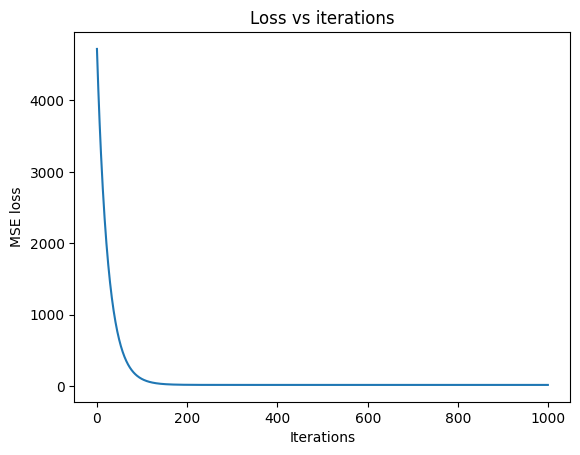

In [31]:
# Plot the losses

plt.plot(losses)
plt.title("Loss vs iterations")
plt.xlabel("Iterations")
plt.ylabel("MSE loss")
plt.show()

In [33]:
# Compute the train and test loss of the learned weights

print("Model train loss: {}".format(mse(y_train, f(X_train, weights, bias))))
print("Model test loss: {}".format(mse(y_test, f(X_test, weights, bias))))

Model train loss: 15.949798583984375
Model test loss: 16.72892951965332


Compare your learned weights and bias to the exact solution computed earlier. They should be fairly close:

In [34]:
# Print the learned weights and bias

print("Learned weights:")
print(weights.numpy())
print("Learned bias:")
print(bias.numpy())

Learned weights:
[-2.2671604  -0.12080535  0.87353975  0.5304503   0.09364847  0.8197327
 -2.7837522   0.86574376  1.5080284   3.0500073 ]
Learned bias:
[69.34601]


In [35]:
# Print the exact weights and bias

print("Exact ML weights:")
print(weights_ml.numpy())
print("Exact ML bias:")
print(bias_ml.numpy())

Exact ML weights:
[[-2.2666159 ]
 [-0.12114453]
 [ 0.87337685]
 [ 0.53025115]
 [ 0.09370303]
 [ 0.8198291 ]
 [-2.7841158 ]
 [ 0.86577654]
 [ 1.507921  ]
 [ 3.050726  ]]
Exact ML bias:
[69.34616]


Congratulations on completing this week's assignment! You have now implemented the exact linear regression solution in TensorFlow as well as the gradient descent algorithm for approximating the maximum likelihood parameters. 